Simple CNN created here, without pretrain.

In [1]:
METADATA_COL2DESC = {
    "isic_id": "Unique identifier for each image case.",
    "target": "Binary class label (0 = benign, 1 = malignant).",
    "patient_id": "Unique identifier for each patient.",
    "age_approx": "Approximate age of the patient at time of imaging.",
    "sex": "Sex of the patient (male or female).",
    "anatom_site_general": "General location of the lesion on the patient's body.",
    "clin_size_long_diam_mm": "Maximum diameter of the lesion (mm).",
    "image_type": "Type of image captured, as defined in the ISIC Archive.",
    "tbp_tile_type": "Lighting modality of the 3D Total Body Photography (TBP) source image.",
    "tbp_lv_A": "Color channel A (green-red axis in LAB space) inside the lesion.",
    "tbp_lv_Aext": "Color channel A outside the lesion.",
    "tbp_lv_B": "Color channel B (blue-yellow axis in LAB space) inside the lesion.",
    "tbp_lv_Bext": "Color channel B outside the lesion.",
    "tbp_lv_C": "Chroma value inside the lesion.",
    "tbp_lv_Cext": "Chroma value outside the lesion.",
    "tbp_lv_H": "Hue value inside the lesion (LAB color space).",
    "tbp_lv_Hext": "Hue value outside the lesion.",
    "tbp_lv_L": "Luminance inside the lesion (LAB color space).",
    "tbp_lv_Lext": "Luminance outside the lesion.",
    "tbp_lv_areaMM2": "Area of the lesion in mm².",
    "tbp_lv_area_perim_ratio": "Ratio of the lesion's perimeter to its area (border jaggedness).",
    "tbp_lv_color_std_mean": "Mean color irregularity within the lesion.",
    "tbp_lv_deltaA": "Average contrast in color channel A between inside and outside.",
    "tbp_lv_deltaB": "Average contrast in color channel B between inside and outside.",
    "tbp_lv_deltaL": "Average contrast in luminance between inside and outside.",
    "tbp_lv_deltaLB": "Combined contrast between the lesion and surrounding skin.",
    "tbp_lv_deltaLBnorm": "Normalized contrast (LAB color space).",
    "tbp_lv_eccentricity": "Eccentricity of the lesion (how elongated it is).",
    "tbp_lv_location": "Detailed anatomical location (e.g., Upper Arm).",
    "tbp_lv_location_simple": "Simplified anatomical location (e.g., Arm).",
    "tbp_lv_minorAxisMM": "Smallest diameter of the lesion in mm.",
    "tbp_lv_nevi_confidence": "Confidence score (0-100) for the lesion being a nevus.",
    "tbp_lv_norm_border": "Normalized border irregularity (0-10 scale).",
    "tbp_lv_norm_color": "Normalized color variation (0-10 scale).",
    "tbp_lv_perimeterMM": "Perimeter of the lesion in mm.",
    "tbp_lv_radial_color_std_max": "Color asymmetry within the lesion, measured radially.",
    "tbp_lv_stdL": "Std. deviation of luminance inside the lesion.",
    "tbp_lv_stdLExt": "Std. deviation of luminance outside the lesion.",
    "tbp_lv_symm_2axis": "Asymmetry about a second axis of symmetry.",
    "tbp_lv_symm_2axis_angle": "Angle of that second axis of symmetry.",
    "tbp_lv_x": "X-coordinate in the 3D TBP model.",
    "tbp_lv_y": "Y-coordinate in the 3D TBP model.",
    "tbp_lv_z": "Z-coordinate in the 3D TBP model.",
    "attribution": "Image source or institution.",
    "copyright_license": "License information.",
    "lesion_id": "Unique ID for lesions of interest.",
    "iddx_full": "Full diagnosis classification.",
    "iddx_1": "First-level (broad) diagnosis.",
    "iddx_2": "Second-level diagnosis.",
    "iddx_3": "Third-level diagnosis.",
    "iddx_4": "Fourth-level diagnosis.",
    "iddx_5": "Fifth-level diagnosis.",
    "mel_mitotic_index": "Mitotic index of invasive malignant melanomas.",
    "mel_thick_mm": "Thickness of melanoma invasion in mm.",
    "tbp_lv_dnn_lesion_confidence": "Lesion confidence score (0-100) from a DNN classifier."
}

METADATA_COL2NAME = {
    "isic_id": "Unique Case Identifier",
    "target": "Binary Lesion Classification",
    "patient_id": "Unique Patient Identifier",
    "age_approx": "Approximate Age",
    "sex": "Sex",
    "anatom_site_general": "General Anatomical Location",
    "clin_size_long_diam_mm": "Clinical Size (Longest Diameter in mm)",
    "image_type": "Image Type",
    "tbp_tile_type": "TBP Tile Type",
    "tbp_lv_A": "Color Channel A (Inside)",
    "tbp_lv_Aext": "Color Channel A (Outside)",
    "tbp_lv_B": "Color Channel B (Inside)",
    "tbp_lv_Bext": "Color Channel B (Outside)",
    "tbp_lv_C": "Chroma (Inside)",
    "tbp_lv_Cext": "Chroma (Outside)",
    "tbp_lv_H": "Hue (Inside)",
    "tbp_lv_Hext": "Hue (Outside)",
    "tbp_lv_L": "Luminance (Inside)",
    "tbp_lv_Lext": "Luminance (Outside)",
    "tbp_lv_areaMM2": "Lesion Area (mm²)",
    "tbp_lv_area_perim_ratio": "Area-to-Perimeter Ratio",
    "tbp_lv_color_std_mean": "Mean Color Irregularity",
    "tbp_lv_deltaA": "Delta A",
    "tbp_lv_deltaB": "Delta B",
    "tbp_lv_deltaL": "Delta L",
    "tbp_lv_deltaLB": "Delta LB",
    "tbp_lv_deltaLBnorm": "Normalized Delta LB",
    "tbp_lv_eccentricity": "Eccentricity",
    "tbp_lv_location": "Detailed Location",
    "tbp_lv_location_simple": "Simplified Location",
    "tbp_lv_minorAxisMM": "Smallest Diameter (mm)",
    "tbp_lv_nevi_confidence": "Nevus Confidence Score",
    "tbp_lv_norm_border": "Normalized Border Irregularity",
    "tbp_lv_norm_color": "Normalized Color Variation",
    "tbp_lv_perimeterMM": "Lesion Perimeter (mm)",
    "tbp_lv_radial_color_std_max": "Radial Color Deviation",
    "tbp_lv_stdL": "Std. Dev. Luminance (Inside)",
    "tbp_lv_stdLExt": "Std. Dev. Luminance (Outside)",
    "tbp_lv_symm_2axis": "Symmetry (Second Axis)",
    "tbp_lv_symm_2axis_angle": "Symmetry Angle (Second Axis)",
    "tbp_lv_x": "X-Coordinate",
    "tbp_lv_y": "Y-Coordinate",
    "tbp_lv_z": "Z-Coordinate",
    "attribution": "Image Source",
    "copyright_license": "Copyright",
    "lesion_id": "Unique Lesion ID",
    "iddx_full": "Full Diagnosis",
    "iddx_1": "Diagnosis Level 1",
    "iddx_2": "Diagnosis Level 2",
    "iddx_3": "Diagnosis Level 3",
    "iddx_4": "Diagnosis Level 4",
    "iddx_5": "Diagnosis Level 5",
    "mel_mitotic_index": "Mitotic Index (Melanoma)",
    "mel_thick_mm": "Melanoma Thickness (mm)",
    "tbp_lv_dnn_lesion_confidence": "Lesion DNN Confidence"
}

In [2]:
import os
import h5py
import cv2
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, random_split
import torchvision.transforms as T
import matplotlib.pyplot as plt

from torchvision import models
from tqdm.auto import tqdm

In [3]:
# If using GPU
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print("Using device:", device)

Using device: mps


## Custom Dataset for HDF5

In [4]:
class ISIC_HDF5_Dataset(Dataset):
    """
    A PyTorch Dataset that loads images from an HDF5 file given a DataFrame of IDs.
    Applies image transforms suitable for ResNet50.
    """
    def __init__(self, df: pd.DataFrame, hdf5_path: str, transform=None, is_labelled: bool = True):
        """
        Args:
            df (pd.DataFrame): DataFrame containing 'isic_id' and optionally 'target'.
            hdf5_path (str): Path to the HDF5 file containing images.
            transform (callable): Optional transforms to be applied on a sample.
            is_labelled (bool): Whether the dataset includes labels (for train/val).
        """
        self.df = df.reset_index(drop=True)
        self.hdf5_path = hdf5_path
        self.transform = transform
        self.is_labelled = is_labelled

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        isic_id = row["isic_id"]
        
        # Load image from HDF5
        image_rgb = self._load_image_from_hdf5(isic_id)
        
        # Apply transforms (PIL-style transforms require converting np array to PIL, or we can do tensor transforms)
        if self.transform is not None:
            # Convert NumPy array (H x W x C) to a PIL Image
            import torchvision.transforms.functional as F_v
            image_pil = F_v.to_pil_image(image_rgb)
            image = self.transform(image_pil)
        else:
            # By default, convert it to a tensor (C x H x W)
            image = torch.from_numpy(image_rgb).permute(2, 0, 1).float()

        if self.is_labelled:
            label = row["target"]
            label = torch.tensor(label).float()
            return image, label, isic_id
        else:
            return image, isic_id

    def _load_image_from_hdf5(self, isic_id: str):
        """
        Loads and decodes an image from HDF5 by isic_id.
        Returns a NumPy array in RGB format (H x W x 3).
        """
        with h5py.File(self.hdf5_path, 'r') as hf:
            encoded_bytes = hf[isic_id][()]  # uint8 array

        # If it's bytes (not np.ndarray), convert it
        if isinstance(encoded_bytes, bytes):
            encoded_bytes = np.frombuffer(encoded_bytes, dtype=np.uint8)
        elif isinstance(encoded_bytes, np.ndarray) and encoded_bytes.dtype != np.uint8:
            encoded_bytes = encoded_bytes.astype(np.uint8)

        # Decode the image bytes with OpenCV (returns BGR)
        image_bgr = cv2.imdecode(encoded_bytes, cv2.IMREAD_COLOR)
        # Convert to RGB
        image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
        return image_rgb

## Data Setup

In [5]:
TRAIN_METADATA_CSV = "/Users/jorgecamposmarti/Documents/Máster/4o Semicuatrimestre/3. ML (Machine Learning)/Project 2/data/new-train-metadata.csv"
TEST_METADATA_CSV  = "/Users/jorgecamposmarti/Documents/Máster/4o Semicuatrimestre/3. ML (Machine Learning)/Project 2/data/students-test-metadata.csv"
TRAIN_HDF5         = "/Users/jorgecamposmarti/Documents/Máster/4o Semicuatrimestre/3. ML (Machine Learning)/Project 2/data/train-image.hdf5"
TEST_HDF5          = "/Users/jorgecamposmarti/Documents/Máster/4o Semicuatrimestre/3. ML (Machine Learning)/Project 2/data/test-image.hdf5"

train_df = pd.read_csv(TRAIN_METADATA_CSV)
test_df  = pd.read_csv(TEST_METADATA_CSV)

print(f"train_df shape: {train_df.shape}")
print(f"test_df shape:  {test_df.shape}")

train_df shape: (400959, 55)
test_df shape:  (100, 44)


/var/folders/8g/6pyhwxxx6y147q2dm10zjk1w0000gn/T/ipykernel_79724/2683077871.py:6: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv(TRAIN_METADATA_CSV)


In [6]:
print(train_df.columns[51])
print(train_df.columns[52])

iddx_5
mel_mitotic_index


Different columns between train and test:

In [7]:
train_columns = set(train_df.columns)
test_columns = set(test_df.columns)

only_in_train = train_columns - test_columns
only_in_test  = test_columns - train_columns

print("Columns only in train_df:", only_in_train)
print("Columns only in test_df:", only_in_test)

Columns only in train_df: {'mel_mitotic_index', 'iddx_1', 'iddx_4', 'tbp_lv_dnn_lesion_confidence', 'mel_thick_mm', 'iddx_full', 'lesion_id', 'iddx_2', 'iddx_3', 'iddx_5', 'target'}
Columns only in test_df: set()


- "target": "Binary class label (0 = benign, 1 = malignant).",
- "lesion_id": "Unique ID for lesions of interest.",
- "iddx_full": "Full diagnosis classification.",
- "iddx_1": "First-level (broad) diagnosis.",
- "iddx_2": "Second-level diagnosis.",
- "iddx_3": "Third-level diagnosis.",
- "iddx_4": "Fourth-level diagnosis.",
- "iddx_5": "Fifth-level diagnosis.",
- "mel_mitotic_index": "Mitotic index of invasive malignant melanomas.",
- "mel_thick_mm": "Thickness of melanoma invasion in mm.",
- "tbp_lv_dnn_lesion_confidence": "Lesion confidence score (0-100) from a DNN classifier."

Class imbalance: undersample class 0 so it has the same number of samples as class 1:

In [8]:
class_counts = train_df['target'].value_counts()
print(class_counts)

target
0    400616
1       343
Name: count, dtype: int64


In [9]:
# Separate the two classes
class_0_df = train_df[train_df['target'] == 0]
class_1_df = train_df[train_df['target'] == 1]

# Determine how many samples are in the minority class (class 1)
n_class_1 = len(class_1_df)

# Randomly undersample class 0
class_0_undersampled = class_0_df.sample(n=n_class_1, random_state=42)

# Concatenate both to get a balanced dataframe
train_df = pd.concat([class_0_undersampled, class_1_df]).sample(frac=1, random_state=42).reset_index(drop=True)

# Check result
print(train_df['target'].value_counts())

target
0    343
1    343
Name: count, dtype: int64


In [10]:
# Example: split train_df into 80% train / 20% valid
train_size = int(0.8 * len(train_df))
valid_size = len(train_df) - train_size
train_subset, valid_subset = random_split(
    train_df, 
    [train_size, valid_size],
    generator=torch.Generator().manual_seed(42)
)

train_df_sub = train_df.iloc[train_subset.indices].reset_index(drop=True)
valid_df_sub = train_df.iloc[valid_subset.indices].reset_index(drop=True)

print(f"Train samples: {len(train_df_sub)}, Valid samples: {len(valid_df_sub)}")

Train samples: 548, Valid samples: 138


In [11]:
"""# Basic transforms for ResNet
resnet_transforms = T.Compose([
    T.Resize((224,224)),
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225]),
])"""

resnet_transforms = T.Compose([
    T.RandomHorizontalFlip(),       # Random each call
    T.RandomRotation(15),           # Random each call
    T.Resize((224, 224)),
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225])
])


# Create Datasets
train_dataset = ISIC_HDF5_Dataset(
    df=train_df_sub, 
    hdf5_path=TRAIN_HDF5,
    transform=resnet_transforms,
    is_labelled=True
)

valid_dataset = ISIC_HDF5_Dataset(
    df=valid_df_sub,
    hdf5_path=TRAIN_HDF5,
    transform=resnet_transforms,
    is_labelled=True
)

test_dataset = ISIC_HDF5_Dataset(
    df=test_df,
    hdf5_path=TEST_HDF5,
    transform=resnet_transforms,
    is_labelled=False
)

print("Created train/valid/test datasets.")

Created train/valid/test datasets.


In [12]:
BATCH_SIZE = 32

train_loader = DataLoader(
    train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True
)

valid_loader = DataLoader(
    valid_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False
)

test_loader = DataLoader(
    test_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False
)

print(f"Train loader: {len(train_loader)} batches")
print(f"Valid loader: {len(valid_loader)} batches")
print(f"Test loader:  {len(test_loader)} batches")

Train loader: 18 batches
Valid loader: 5 batches
Test loader:  4 batches


## Model

In [13]:
class Lenet1(nn.Module):
    def __init__(self, dimx): #Nlabels will be 10 in our case
        super().__init__()

        # Spatial dimension of the Tensor at the output of the 2nd CNN
        self.final_dim = int(((dimx-4)/2-4)/2)  #((32-4)/2-4)/2=5

        # convolutional layer (sees [3, 224, 224] image tensor)
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, 
                               kernel_size=5, stride=1, padding=0)
        
        # convolutional layer
        self.conv2 = nn.Conv2d(6, 12, 5, padding=0)

        self.conv3 = nn.Conv2d(12, 24, 5, padding=0)

        self.conv4 = nn.Conv2d(24, 6, 5, padding=0)
        
        # Max pool layer
        self.pool = nn.MaxPool2d(2, 2)

        # Linear layers
        self.linear1 = nn.Linear(6 * 10**2,120)
        
        self.linear2 = nn.Linear(120,84)
        
        self.linear3 = nn.Linear(84,1)
    
        self.relu = nn.ReLU()

        self.sigmoid = nn.Sigmoid()
        
        
        
    def forward(self, x):
        # Pass the input tensor through the CNN operations
        x = self.conv1(x) #YOUR CODE HERE
        x = self.relu(x) 
        x = self.pool(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.pool(x)
        x = self.conv3(x)
        x = self.relu(x)
        x = self.pool(x)
        x = self.conv4(x)
        x = self.relu(x)
        x = self.pool(x)
        x = x.view(x.size(0), -1)
        # Pass the tensor through the Dense Layers
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        x = self.relu(x)
        x = self.linear3(x)
        x = self.sigmoid(x) 
        x = x.view(-1)
        return x

In [14]:
class SmallCNN1(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),  # [B, 16, 224, 224]
            nn.ReLU(),
            nn.MaxPool2d(2),  # [B, 16, 112, 112]

            nn.Conv2d(16, 32, kernel_size=3, padding=1),  # [B, 32, 112, 112]
            nn.ReLU(),
            nn.MaxPool2d(2),  # [B, 32, 56, 56]

            nn.Conv2d(32, 64, kernel_size=3, padding=1),  # [B, 64, 56, 56]
            nn.ReLU(),
            nn.MaxPool2d(2),  # [B, 64, 28, 28]
        )
        self.fc_layers = nn.Sequential(
            nn.Flatten(),              # [B, 64*28*28]
            nn.Linear(64 * 28 * 28, 128),
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        x = self.conv_layers(x)
        x = self.fc_layers(x)
        x = x.view(-1)
        return x


In [15]:
import torch.optim as optim
from torchvision import models

model = SmallCNN1()

model = model.to(device)

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

EPOCHS = 50

# Initialize variables to track the best model
best_val_loss = float('inf')  # Start with a very large number
train_losses = []  # To store training losses
val_losses = []    # To store validation losses
best_model = None  # Variable to store the best model

for epoch in range(1, EPOCHS+1):

    # -- TRAINING --
    model.train()
    running_loss = 0.0
    
    for images, labels, _ in tqdm(train_loader, desc=f"Epoch {epoch}", leave=False):
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        output = model(images)
        
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    avg_train_loss = running_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    
    # -- VALIDATING --

    model.eval()
    val_loss = 0.0
    
    with torch.no_grad():
        for images, labels, _ in valid_loader:
            images, labels = images.to(device), labels.to(device)
            output = model(images)
            loss = criterion(output, labels)
            val_loss += loss.item()
    
    avg_val_loss = val_loss / len(valid_loader)
    val_losses.append(avg_val_loss)
    
    print(f"Epoch {epoch}/{EPOCHS} | Train Loss: {avg_train_loss:.4f} | Val Loss: {avg_val_loss:.4f}")

    # -- Check if this is the best model so far --
    if avg_val_loss < best_val_loss:
        #print(f"Validation loss decreased ({best_val_loss:.4f} -> {avg_val_loss:.4f}). Saving model...")
        best_val_loss = avg_val_loss
        best_model = model.state_dict()  # Save the model's state dict in the variable

# If you want to load the best model from the variable:
model.load_state_dict(best_model)
model = model.to(device)
print(f"Best model val loss: {best_val_loss}")

Epoch 1:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch 1/50 | Train Loss: 0.6872 | Val Loss: 0.6783


Epoch 2:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch 2/50 | Train Loss: 0.6475 | Val Loss: 0.6579


Epoch 3:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch 3/50 | Train Loss: 0.6147 | Val Loss: 0.6266


Epoch 4:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch 4/50 | Train Loss: 0.5671 | Val Loss: 0.6097


Epoch 5:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch 5/50 | Train Loss: 0.5867 | Val Loss: 0.6028


Epoch 6:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch 6/50 | Train Loss: 0.5189 | Val Loss: 0.5362


Epoch 7:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch 7/50 | Train Loss: 0.4930 | Val Loss: 0.5149


Epoch 8:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch 8/50 | Train Loss: 0.4864 | Val Loss: 0.5159


Epoch 9:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch 9/50 | Train Loss: 0.4770 | Val Loss: 0.4895


Epoch 10:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch 10/50 | Train Loss: 0.4870 | Val Loss: 0.4652


Epoch 11:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch 11/50 | Train Loss: 0.4805 | Val Loss: 0.4671


Epoch 12:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch 12/50 | Train Loss: 0.4600 | Val Loss: 0.4628


Epoch 13:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch 13/50 | Train Loss: 0.4845 | Val Loss: 0.4637


Epoch 14:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch 14/50 | Train Loss: 0.4346 | Val Loss: 0.4665


Epoch 15:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch 15/50 | Train Loss: 0.4452 | Val Loss: 0.4574


Epoch 16:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch 16/50 | Train Loss: 0.4253 | Val Loss: 0.4871


Epoch 17:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch 17/50 | Train Loss: 0.4546 | Val Loss: 0.4635


Epoch 18:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch 18/50 | Train Loss: 0.4153 | Val Loss: 0.4517


Epoch 19:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch 19/50 | Train Loss: 0.4382 | Val Loss: 0.4452


Epoch 20:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch 20/50 | Train Loss: 0.4454 | Val Loss: 0.4609


Epoch 21:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch 21/50 | Train Loss: 0.4219 | Val Loss: 0.4588


Epoch 22:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch 22/50 | Train Loss: 0.4266 | Val Loss: 0.4534


Epoch 23:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch 23/50 | Train Loss: 0.4167 | Val Loss: 0.4362


Epoch 24:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch 24/50 | Train Loss: 0.4018 | Val Loss: 0.4491


Epoch 25:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch 25/50 | Train Loss: 0.4034 | Val Loss: 0.4416


Epoch 26:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch 26/50 | Train Loss: 0.4104 | Val Loss: 0.4572


Epoch 27:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch 27/50 | Train Loss: 0.4166 | Val Loss: 0.4382


Epoch 28:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch 28/50 | Train Loss: 0.4211 | Val Loss: 0.4500


Epoch 29:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch 29/50 | Train Loss: 0.4061 | Val Loss: 0.4238


Epoch 30:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch 30/50 | Train Loss: 0.3993 | Val Loss: 0.4457


Epoch 31:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch 31/50 | Train Loss: 0.4068 | Val Loss: 0.4376


Epoch 32:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch 32/50 | Train Loss: 0.3845 | Val Loss: 0.4362


Epoch 33:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch 33/50 | Train Loss: 0.4088 | Val Loss: 0.4351


Epoch 34:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch 34/50 | Train Loss: 0.4022 | Val Loss: 0.4279


Epoch 35:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch 35/50 | Train Loss: 0.4095 | Val Loss: 0.4449


Epoch 36:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch 36/50 | Train Loss: 0.3894 | Val Loss: 0.4210


Epoch 37:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch 37/50 | Train Loss: 0.3839 | Val Loss: 0.4360


Epoch 38:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch 38/50 | Train Loss: 0.3855 | Val Loss: 0.4409


Epoch 39:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch 39/50 | Train Loss: 0.3946 | Val Loss: 0.4249


Epoch 40:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch 40/50 | Train Loss: 0.3725 | Val Loss: 0.4495


Epoch 41:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch 41/50 | Train Loss: 0.3820 | Val Loss: 0.4142


Epoch 42:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch 42/50 | Train Loss: 0.3761 | Val Loss: 0.4220


Epoch 43:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch 43/50 | Train Loss: 0.3665 | Val Loss: 0.4351


Epoch 44:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch 44/50 | Train Loss: 0.3870 | Val Loss: 0.4353


Epoch 45:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch 45/50 | Train Loss: 0.3730 | Val Loss: 0.4322


Epoch 46:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch 46/50 | Train Loss: 0.3933 | Val Loss: 0.4294


Epoch 47:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch 47/50 | Train Loss: 0.3725 | Val Loss: 0.4533


Epoch 48:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch 48/50 | Train Loss: 0.3856 | Val Loss: 0.4262


Epoch 49:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch 49/50 | Train Loss: 0.3435 | Val Loss: 0.4680


Epoch 50:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch 50/50 | Train Loss: 0.3603 | Val Loss: 0.4330
Best model val loss: 0.4141822636127472


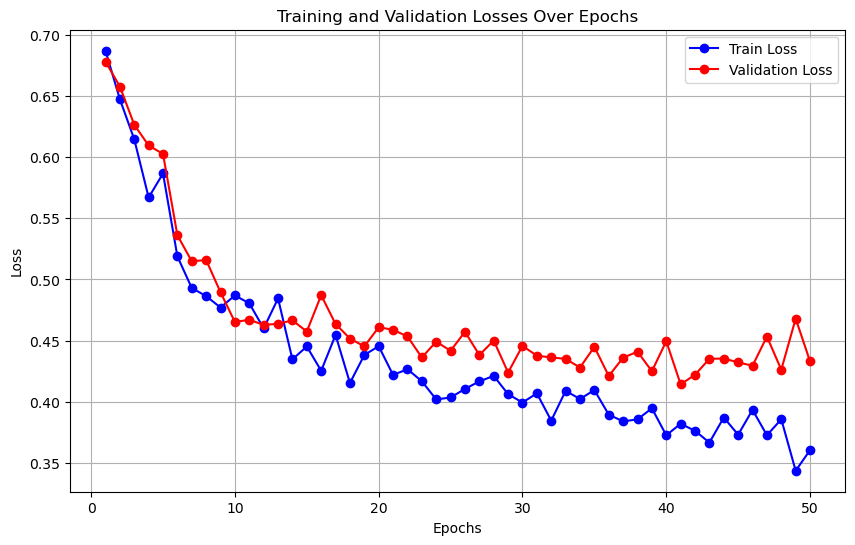

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, EPOCHS + 1), train_losses, label='Train Loss', color='blue', marker='o')
plt.plot(range(1, EPOCHS + 1), val_losses, label='Validation Loss', color='red', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Losses Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
# -----------------------------
# 7. Inference on Test Set & Submission
# -----------------------------
model.eval()
predictions = []

with torch.no_grad():
    for images, isic_ids in tqdm(test_loader, desc="Inference on Test"):
        images = images.to(device)
        logits = model(images).view(-1)  # shape [batch_size]
        probs = torch.sigmoid(logits)    # shape [batch_size], in [0,1]
        
        probs = probs.cpu().numpy()
        
        for isic_id, p in zip(isic_ids, probs):
            predictions.append({"isic_id": isic_id, "target": float(p)})

submission_df = pd.DataFrame(predictions)
submission_df = submission_df.sort_values(by="isic_id").reset_index(drop=True)

submission_file = "submission_I_scnn.csv"
submission_df.to_csv(submission_file, index=False)

print(f"Saved submission with {len(submission_df)} rows to {submission_file}")
display(submission_df.head(10))


Inference on Test:   0%|          | 0/4 [00:00<?, ?it/s]

Saved submission with 100 rows to submission_I_scnn.csv


,isic_id,target
0,ISIC_0082829,0.723807
1,ISIC_0114227,0.548628
2,ISIC_0157465,0.525961
3,ISIC_0197356,0.505254
4,ISIC_0275647,0.601736
5,ISIC_0332355,0.565530
6,ISIC_0528190,0.730172
7,ISIC_0576478,0.518059
8,ISIC_0719839,0.717088
9,ISIC_0968965,0.612005


Results are better with a pre-trained model.